# Import Libraries 

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
Ascorbic_10 = os.listdir("Ascorbic 10 PPM")

In [3]:
print(Ascorbic_10[: 5])
print(len(Ascorbic_10))

['20250411_122158.jpg', '20250411_122200.jpg', '20250411_122202.jpg', '20250411_122204.jpg', '20250411_122208.jpg']
100


In [4]:
Ascorbic_100 = os.listdir("Ascorbic 100 PPM")

In [5]:
print(Ascorbic_100[: 5])
print(len(Ascorbic_100))

['20250411_165514.jpg', '20250411_165524.jpg', '20250411_165527.jpg', '20250411_165531.jpg', '20250411_165600.jpg']
100


In [6]:
Ascorbic_50 = os.listdir("Ascorbic 50 PPM")

In [7]:
print(Ascorbic_50[: 5])
print(len(Ascorbic_50))

['20250411_143114.jpg', '20250411_143118.jpg', '20250411_143121.jpg', '20250411_143125.jpg', '20250411_143129.jpg']
100


In [8]:
Chitosan_2 = os.listdir("Chitosan 2_")

In [9]:
print(Chitosan_2[: 5])
print(len(Chitosan_2))

['20250411_051855.jpg', '20250411_051901.jpg', '20250411_051905.jpg', '20250411_051918.jpg', '20250411_051921.jpg']
186


In [10]:
Chitosan_4 = os.listdir("Chitosan 4_")

In [11]:
print(Chitosan_4[: 5])
print(len(Chitosan_4))

['20250411_062927.jpg', '20250411_062929.jpg', '20250411_062932.jpg', '20250411_062945.jpg', '20250411_062959.jpg']
186


In [12]:
Chitosan_6 = os.listdir("Chitosan 6_")

In [13]:
print(Chitosan_6[: 5])
print(len(Chitosan_6))

['20250411_102233.jpg', '20250411_102237.jpg', '20250411_102241.jpg', '20250411_102249.jpg', '20250411_102252.jpg']
179


In [14]:
Citric_10 = os.listdir("Citric 10 PPM")

In [15]:
print(Citric_10[: 5])
print(len(Citric_10))

['20250413_042837.jpg', '20250413_042841.jpg', '20250413_042844.jpg', '20250413_042847.jpg', '20250413_042850.jpg']
100


In [16]:
Citric_50 = os.listdir("Citric 50 PPM")

In [17]:
print(Citric_50[: 5])
print(len(Citric_50))

['20250413_031320.jpg', '20250413_031340.jpg', '20250413_031344.jpg', '20250413_031348.jpg', '20250413_031357.jpg']
100


In [18]:
Citric_100 = os.listdir("Citric 100 PPM")

In [19]:
print(Citric_100[: 5])
print(len(Citric_100))

['20250413_105909.jpg', '20250413_105912.jpg', '20250413_105915.jpg', '20250413_105919.jpg', '20250413_105922.jpg']
100


In [20]:
Controlled= os.listdir("Controlled")

In [21]:
print(Controlled[: 5])
print(len(Controlled))

['20250408_030959.jpg', '20250408_031007.jpg', '20250408_031016.jpg', '20250408_031023.jpg', '20250408_031044.jpg']
433


# Lettuce Treatment and Chemical Composition Analysis

In [22]:
# Define the data
data = {
    'Category': [
        'Ascorbic_10', 'Ascorbic_50', 'Ascorbic_100',
        'Citric_10', 'Citric_50', 'Citric_100',
        'Chitosan_2', 'Chitosan_4', 'Chitosan_6'
    ],
    'Tannin': [11.2, 17.0, 27.3, 42.6, 38.3, 31.3, 21.7, 31.7, 45.9],
    'Phenolic': [48, 38, 57, 79, 93, 120, 45, 42, 55],
    'Flavonoid': [29.8, 21.8, 15, 14, 8.29, 5, 40.6, 20.4, 35]
    ,
    
}

# Create DataFrame
df = pd.DataFrame(data)

In [23]:
df

,Category,Tannin,Phenolic,Flavonoid
0,Ascorbic_10,11.2,48,29.80
1,Ascorbic_50,17.0,38,21.80
2,Ascorbic_100,27.3,57,15.00
3,Citric_10,42.6,79,14.00
4,Citric_50,38.3,93,8.29
5,Citric_100,31.3,120,5.00
6,Chitosan_2,21.7,45,40.60
7,Chitosan_4,31.7,42,20.40
8,Chitosan_6,45.9,55,35.00


# Extract and Store Lettuce Chemical Readings with Image Paths

In [24]:
import os
import pandas as pd

# 📍 Chemical readings (dictionary)
chemical_readings = {
    'Ascorbic_10':  {'Flavonoid': 29.8,  'Phenolic': 48,  'Tannin': 11.2},
    'Ascorbic_50':  {'Flavonoid': 21.8,  'Phenolic': 38,  'Tannin': 17.0},
    'Ascorbic_100': {'Flavonoid': 15.0,  'Phenolic': 57,  'Tannin': 27.3},
    'Citric_10':    {'Flavonoid': 14.0,  'Phenolic': 79,  'Tannin': 42.6},
    'Citric_50':    {'Flavonoid': 8.29,  'Phenolic': 93,  'Tannin': 38.3},
    'Citric_100':   {'Flavonoid': 5.0,   'Phenolic': 120, 'Tannin': 31.3},
    'Chitosan_2':   {'Flavonoid': 40.6,  'Phenolic': 45,  'Tannin': 21.7},
    'Chitosan_4':   {'Flavonoid': 20.4,  'Phenolic': 42,  'Tannin': 31.7},
    'Chitosan_6':   {'Flavonoid': 35.0,  'Phenolic': 55,  'Tannin': 45.9}
}
# 📁 Set the root directory where all treatment folders are stored
root_dir = r"C:\Users\shivani\Desktop\Iceburg Lettuce"

# 🗂️ Collect all records
records = []

for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    if not os.path.isdir(folder_path):
        continue

    # ✅ Normalize folder name: e.g., "Chitosan 2_" → "Chitosan_2"
    normalized_class = folder_name.replace(" ", "_").replace("_PPM", "").rstrip("_")

    for file in os.listdir(folder_path):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            full_path = os.path.join(folder_path, file)

            # ✅ Create a single record
            record = {
                'Image_Path': full_path,
                'Class': folder_name,
                'Normalized_Class': normalized_class
            }

            # ✅ Attach chemical values if available
            if normalized_class in chemical_readings:
                record.update(chemical_readings[normalized_class])
            else:
                record.update({'Flavonoid': None, 'Phenolic': None, 'Tannin': None})

            records.append(record)

# 🧾 Convert to DataFrame
df = pd.DataFrame(records)

# 💾 Save to CSV
output_csv = os.path.join(root_dir, "lettuce_data_with_readings.csv")
df.to_csv(output_csv, index=False)

print(f"✅ CSV created with image paths and chemical values:\n{output_csv}")


✅ CSV created with image paths and chemical values:
C:\Users\shivani\Desktop\Iceburg Lettuce\lettuce_data_with_readings.csv


# Create Control Mean Record

In [25]:
import pandas as pd

# Create Control Mean Record
control_means = {
    'Category': ['Control'],
    'Flavonoid': [round((62.1 + 49 + 67) / 3, 2)],
    'Tannin': [round((26 + 42 + 57) / 3, 2)],
    'Phenolic': [round((76 + 77 + 84) / 3, 2)]
}
# Create DataFrame
df_control = pd.DataFrame(control_means)

In [26]:
df_control

,Category,Flavonoid,Tannin,Phenolic
0,Control,59.37,41.67,79.0


# Preprocessing Lettuce Data: Applying Control Values

In [27]:
import pandas as pd
import os

# 📁 Path to CSV
csv_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\lettuce_data_with_readings.csv"
df = pd.read_csv(csv_path)

# ✅ Define control averages
control_values = {
    'Flavonoid': 59.37,
    'Tannin': 41.67,
    'Phenolic': 79.00
}

# ✅ Normalize class
df['Normalized_Class'] = (
    df['Class']
    .str.replace(" ", "_")
    .str.replace("_PPM", "")
    .str.rstrip("_")
)

# ✅ Apply mean control values
df.loc[df['Normalized_Class'].str.lower() == 'controlled', ['Flavonoid', 'Tannin', 'Phenolic']] = control_values.values()

# ✅ Drop helper column
df.drop(columns=['Normalized_Class'], inplace=True)

# ✅ Save updated CSV
updated_csv_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\lettuce_data_with_control_applied.csv"
df.to_csv(updated_csv_path, index=False)

print(f"✅ Control values filled in. Updated file saved to:\n{updated_csv_path}")


✅ Control values filled in. Updated file saved to:
C:\Users\shivani\Desktop\Iceburg Lettuce\lettuce_data_with_control_applied.csv


#  Build CNN Model

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [29]:
updated_csv_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\lettuce_data_with_control_applied.csv"
df = pd.read_csv(updated_csv_path)

In [30]:
df = df.dropna()

In [31]:
X = df.drop(columns=["Image_Path", "Flavonoid", "Phenolic", "Tannin"], errors='ignore')
y = df[["Flavonoid", "Phenolic", "Tannin"]]

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Extract features
X = df.drop(columns=["Image_Path", "Flavonoid", "Phenolic", "Tannin"], errors='ignore')

# Label encode categorical columns
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store for future decoding if needed

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3)  # 3 outputs: Flavonoid, Phenolic, Tannin
])


In [36]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [37]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
                    verbose=1)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2471.9773 - mae: 44.0100 - val_loss: 2181.4026 - val_mae: 40.7568
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1786.8811 - mae: 35.5570 - val_loss: 575.4757 - val_mae: 19.0356
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 367.6759 - mae: 14.7185 - val_loss: 207.2994 - val_mae: 10.3535
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.1357 - mae: 10.9443 - val_loss: 191.7714 - val_mae: 9.9789
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.6309 - mae: 10.8897 - val_loss: 185.1146 - val_mae: 9.8313
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 215.5772 - mae: 10.7248 - val_loss: 181.3952 - val_mae: 9.6201
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188.2002 - mae: 10.1843 - val_loss: 175.9814 - val_mae: 9.7841
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203.1181 - mae: 10.6618 - val_loss: 172.3146 - val_mae: 9.3324
Epoch 9/100
64/64 

In [38]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Root Mean Squared Value

In [39]:

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R² Score: 0.8569
Mean Squared Error: 42.8632


#  Actual vs Predicted Values for Lettuce Compounds

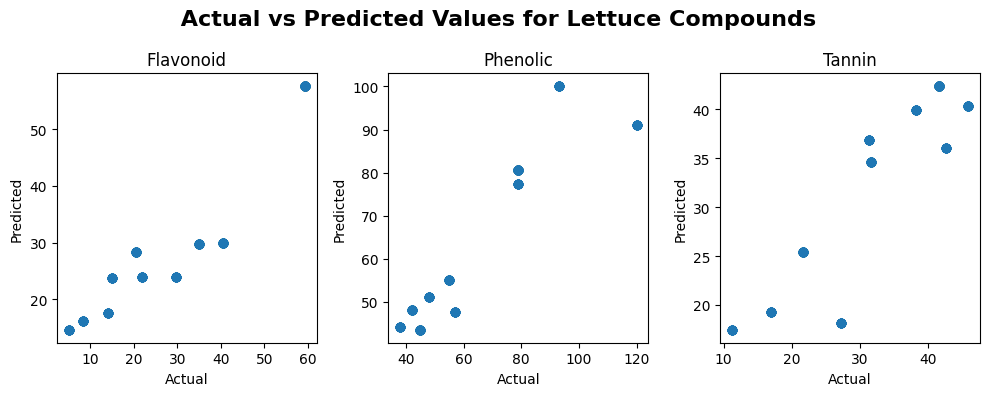

In [40]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(["Flavonoid", "Phenolic", "Tannin"]):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.7)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(col)
plt.suptitle(" Actual vs Predicted Values for Lettuce Compounds", fontsize=16, fontweight='bold')    
plt.tight_layout()
plt.show()

#  Leaf Image Viewer and Chemical Reading Extractor

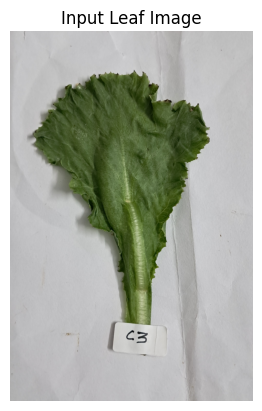


🔍 Chemical Readings from CSV:
Flavonoid: 59.37
Phenolic:  79.0
Tannin:    41.67


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# 📁 Path to your CSV containing all readings
csv_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\lettuce_data_with_control_applied.csv"
df = pd.read_csv(csv_path)

# ✅ Normalize paths for matching (optional)
df['Image_Path'] = df['Image_Path'].str.replace('\\', '/', regex=False)

# ✅ Function to load and display image
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Leaf Image")
    plt.show()

# ✅ Function to get chemical readings from CSV
def get_readings_from_csv(img_path, df):
    # Match the path
    img_path = img_path.replace('\\', '/')
    match = df[df['Image_Path'].str.endswith(os.path.basename(img_path))]
    
    if not match.empty:
        row = match.iloc[0]
        return {
            'Flavonoid': row['Flavonoid'],
            'Phenolic': row['Phenolic'],
            'Tannin': row['Tannin']
        }
    else:
        print("❌ Image not found in CSV.")
        return None

# ✅ Function to display readings
def display_results(readings):
    if readings:
        print("\n🔍 Chemical Readings from CSV:")
        print(f"Flavonoid: {readings['Flavonoid']}")
        print(f"Phenolic:  {readings['Phenolic']}")
        print(f"Tannin:    {readings['Tannin']}")

# ✅ Example usage
image_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\Controlled\20250408_031016.jpg"  # change this to test

display_image(image_path)
readings = get_readings_from_csv(image_path, df)
display_results(readings)


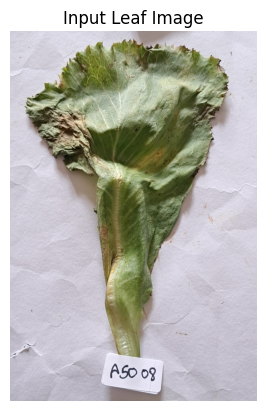


🔍 Chemical Readings from CSV:
Flavonoid: 21.8
Phenolic:  38.0
Tannin:    17.0


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# 📁 Path to your CSV containing all readings
csv_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\lettuce_data_with_control_applied.csv"
df = pd.read_csv(csv_path)

# ✅ Normalize paths for matching (optional)
df['Image_Path'] = df['Image_Path'].str.replace('\\', '/', regex=False)

# ✅ Function to load and display image
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Leaf Image")
    plt.show()

# ✅ Function to get chemical readings from CSV
def get_readings_from_csv(img_path, df):
    # Match the path
    img_path = img_path.replace('\\', '/')
    match = df[df['Image_Path'].str.endswith(os.path.basename(img_path))]
    
    if not match.empty:
        row = match.iloc[0]
        return {
            'Flavonoid': row['Flavonoid'],
            'Phenolic': row['Phenolic'],
            'Tannin': row['Tannin']
        }
    else:
        print("❌ Image not found in CSV.")
        return None

# ✅ Function to display readings
def display_results(readings):
    if readings:
        print("\n🔍 Chemical Readings from CSV:")
        print(f"Flavonoid: {readings['Flavonoid']}")
        print(f"Phenolic:  {readings['Phenolic']}")
        print(f"Tannin:    {readings['Tannin']}")

# ✅ Example usage
image_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\Ascorbic 50 PPM\20250411_143237.jpg"  # change this to test

display_image(image_path)
readings = get_readings_from_csv(image_path, df)
display_results(readings)


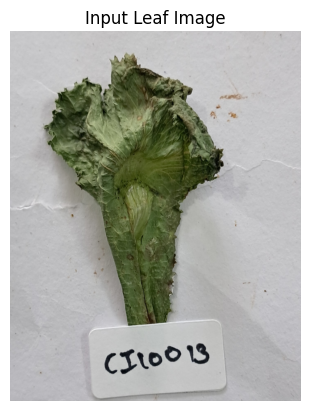


🔍 Chemical Readings from CSV:
Flavonoid: 5.0
Phenolic:  120.0
Tannin:    31.3


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# 📁 Path to your CSV containing all readings
csv_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\lettuce_data_with_control_applied.csv"
df = pd.read_csv(csv_path)

# ✅ Normalize paths for matching (optional)
df['Image_Path'] = df['Image_Path'].str.replace('\\', '/', regex=False)

# ✅ Function to load and display image
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Leaf Image")
    plt.show()

# ✅ Function to get chemical readings from CSV
def get_readings_from_csv(img_path, df):
    # Match the path
    img_path = img_path.replace('\\', '/')
    match = df[df['Image_Path'].str.endswith(os.path.basename(img_path))]
    
    if not match.empty:
        row = match.iloc[0]
        return {
            'Flavonoid': row['Flavonoid'],
            'Phenolic': row['Phenolic'],
            'Tannin': row['Tannin']
        }
    else:
        print("❌ Image not found in CSV.")
        return None

# ✅ Function to display readings
def display_results(readings):
    if readings:
        print("\n🔍 Chemical Readings from CSV:")
        print(f"Flavonoid: {readings['Flavonoid']}")
        print(f"Phenolic:  {readings['Phenolic']}")
        print(f"Tannin:    {readings['Tannin']}")

# ✅ Example usage
image_path = r"C:\Users\shivani\Desktop\Iceburg Lettuce\Citric 100 PPM\20250413_110153.jpg"  # change this to test

display_image(image_path)
readings = get_readings_from_csv(image_path, df)
display_results(readings)
